In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ace_on_acid_results = pd.read_csv('ace_on_acid_results.csv')
df_ace_on_acid_results

,score,SMILES,Name
0,0.971031,[2H]C([2H])([2H])N(C(=O)CCC#C)C(C(=O)NC(C)(C)C...,bide-uc-1195_bide-uc-657_bide-uc-1140_bide-uc-...
1,0.945344,[2H]C([2H])([2H])N(C(=O)c1cccc(C#C)c1)C(C(=O)N...,bide-uc-1925_bide-uc-657_bide-uc-1140_bide-uc-...
2,0.766467,[2H]C([2H])([2H])N(C(=O)CCC#C)C(C(=O)NC(C)(C)C...,bide-uc-1195_bide-uc-994_bide-uc-1140_bide-uc-...
3,0.976187,C#CCCC(=O)N(C(C)C(=O)NC)C(C(=O)NC(C)(C)C)C(F)(F)F,bide-uc-1195_bide-uc-657_bide-uc-1140_bide-uc-...
4,0.121974,[2H]C([2H])([2H])N(C(=O)CCC#C)C(C(=O)NCc1ccccc...,bide-uc-1195_bide-uc-657_bide-uc-1858_bide-uc-...
...,...,...,...
4995,0.873330,C#CCCC(=O)N(Cc1ccc(F)cc1OC)C(C(=O)NC(C)(C)C)C(...,bide-uc-1195_bide-uc-160_bide-uc-1140_bide-uc-...
4996,0.040723,C#CCCC(=O)N(C(C(=O)NC(C)(C)C)c1ccc(O)c2ncccc12...,bide-uc-1195_bide-uc-5135_bide-uc-1140_bide-uc...
4997,0.858705,C#CCCC(=O)N(c1cc(C)c(OC)c(C)c1)C(C(=O)NC(C)(C)...,bide-uc-1195_bide-uc-160_bide-uc-1140_bide-uc-...
4998,0.612592,C#CCCC(=O)N(c1cc(F)c(F)cc1F)C(C(=O)NCc1ccccc1)...,bide-uc-1195_bide-uc-160_bide-uc-1858_bide-uc-399


In [27]:
acid_ids = []
aldehyde_ids = []
amine_ids = []
nc_ids = []
acid_data = {}
aldehyde_data = {}
nc_data = {}
amine_data = {}

for i, r in df_ace_on_acid_results.iterrows():
    score = r['score']
    if score < 0.6:
        continue
    name = r['Name']
    acid_ids.append(name.split('_')[0])
    aldehyde_ids.append(name.split('_')[1])
    nc_ids.append(name.split('_')[2])
    amine_ids.append(name.split('_')[3])
    if name.split('_')[0] not in acid_data:
        acid_data[name.split('_')[0]] = []
    if name.split('_')[1] not in aldehyde_data:
        aldehyde_data[name.split('_')[1]] = []
    if name.split('_')[2] not in nc_data:
        nc_data[name.split('_')[2]] = []
    if name.split('_')[3] not in amine_data:
        amine_data[name.split('_')[3]] = []
    acid_data[name.split('_')[0]].append(r['score'])
    aldehyde_data[name.split('_')[1]].append(r['score'])
    nc_data[name.split('_')[2]].append(r['score'])
    amine_data[name.split('_')[3]].append(r['score'])

print(len(set(acid_ids)))
print(len(set(aldehyde_ids)))
print(len(set(nc_ids)))
print(len(set(amine_ids)))
print(len(set(acid_ids)) * len(set(aldehyde_ids)) * len(set(nc_ids)) * len(set(amine_ids)))

3
327
2
925
1814850


In [24]:
acid_data_avg = {k: sum(v) / len(v) for k, v in acid_data.items()}
aldehyde_data_avg = {k: sum(v) / len(v) for k, v in aldehyde_data.items()}
nc_data_avg = {k: sum(v) / len(v) for k, v in nc_data.items()}
amine_data_avg = {k: sum(v) / len(v) for k, v in amine_data.items()}

In [25]:
acid_data_avg
aldehyde_data_avg
nc_data_avg
amine_data_avg

{'bide-uc-2022': 0.6122178587512105,
 'bide-uc-4070': 0.8361470586393908,
 'bide-uc-1308': 0.9215938170750936,
 'bide-uc-4624': 0.8090326407924294,
 'bide-uc-5341': 0.812123930749173,
 'bide-uc-533': 0.8849654491990804,
 'bide-uc-1252': 0.862787731985251,
 'bide-uc-387': 0.6863315579484612,
 'bide-uc-4702': 0.8188871517777443,
 'bide-uc-232': 0.844109638778027,
 'bide-uc-82': 0.9247384130954742,
 'bide-uc-1828': 0.9047084904741495,
 'bide-uc-399': 0.8144101245701313,
 'bide-uc-1327': 0.8457828248230119,
 'bide-uc-1406': 0.7205069784075022,
 'bide-uc-216': 0.7266692847013473,
 'bide-uc-518': 0.6732414860278367,
 'bide-uc-913': 0.909391272533685,
 'bide-uc-851': 0.7902266635093838,
 'bide-uc-282': 0.7710635010618716,
 'bide-uc-5084': 0.891066836193204,
 'bide-uc-38': 0.6819049714133144,
 'bide-uc-1474': 0.968560912211736,
 'bide-uc-4109': 0.7171809787551563,
 'bide-uc-2920': 0.9355213910341263,
 'bide-uc-4547': 0.6463641404484709,
 'bide-uc-4803': 0.8397729936987162,
 'bide-uc-1403': 0.8

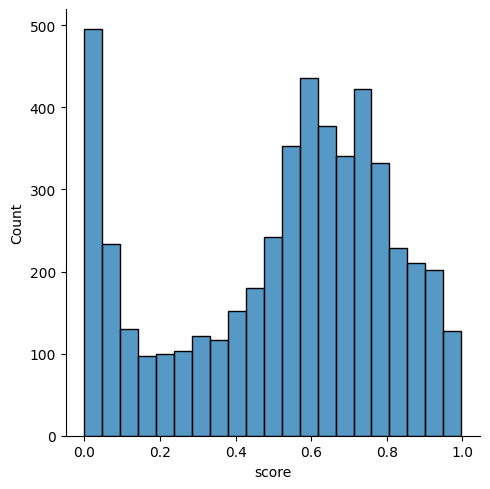

In [19]:
sns.displot(df_ace_on_acid_results, x='score')

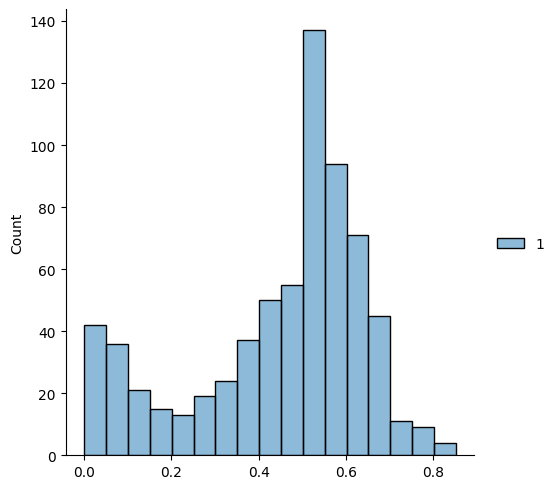

In [20]:
sns.displot(aldehyde_data_avg.items())

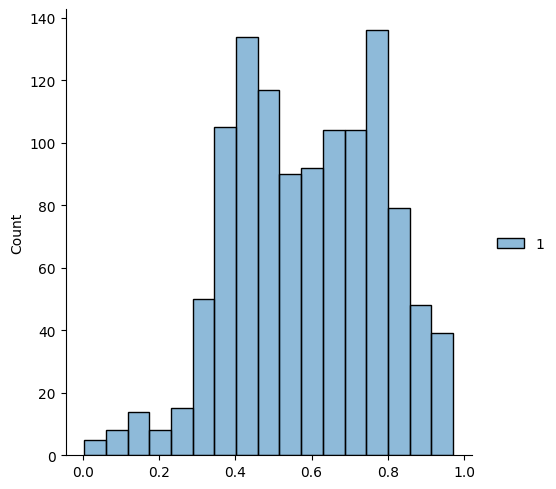

In [22]:
sns.displot(amine_data_avg.items())